# Pandas 简介


**学习目标:**

  * 大致了解 *pandas* 库的 `DataFrame` 和 `Series` 数据结构
  * 存取和处理 `DataFrame` 和 `Series` 中的数据
  * 将 CSV 数据导入 pandas 库的 `DataFrame`
  * 对 `DataFrame` 重建索引来随机打乱数据


 [*pandas*](http://pandas.pydata.org/) 是一种列存数据分析 API。它是用于处理和分析输入数据的强大工具，很多机器学习框架都支持将 *pandas* 数据结构作为输入。
虽然全方位介绍 *pandas* API 会占据很长篇幅，但它的核心概念非常简单，我们会在下文中进行说明。有关更完整的参考，请访问 [*pandas* 文档网站](http://pandas.pydata.org/pandas-docs/stable/index.html)，其中包含丰富的文档和教程资源。


## 基本概念

以下行导入了 *pandas* API 并输出了相应的 API 版本：

In [1]:
import pandas as pd
print(pd.__version__)

0.22.0


*pandas* 中的主要数据结构被实现为以下两类：

  * **`DataFrame`**，您可以将它想象成一个关系型数据表格，其中包含多个行和已命名的列。
  * **`Series`**，它是单一列。`DataFrame` 中包含一个或多个 `Series`，每个 `Series` 均有一个名称。

数据框架(**`DataFrame`**)是用于数据操控的一种常用抽象实现形式。[Spark](https://spark.apache.org/) 和 [R](https://www.r-project.org/about.html) 中也有类似的实现。

创建 `Series` 的一种方法是构建 `Series` 对象。例如：

In [2]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

您可以将映射 `string` 列名称的 `dict` 传递到它们各自的 `Series`，从而创建`DataFrame`对象。如果 `Series` 在长度上不一致，系统会用特殊的 [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 值填充缺失的值。例如：

In [3]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({
    'City name': city_names,
    'Population': population,
})

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


但是在大多数情况下，您需要将整个文件加载到 `DataFrame` 中。下面的示例加载了一个包含加利福尼亚州住房数据的文件。请运行以下单元格以加载数据，并创建特征定义：

In [4]:
california_housing_dataframe = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv', sep=',')
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


上面的示例使用 `DataFrame.describe` 来显示关于 `DataFrame` 的有趣统计信息。另一个实用函数是`DataFrame.head`，它显示 `DataFrame` 的前几个记录：

In [5]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


pandas 的另一个强大功能是绘制图表。例如，借助 DataFrame.hist，您可以快速了解一个列中值的分布：

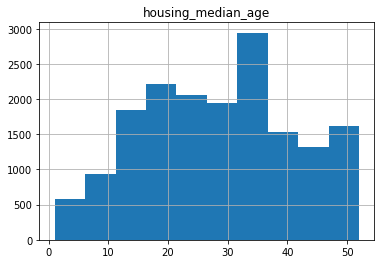

In [6]:
import matplotlib.pyplot as plt

california_housing_dataframe.hist('housing_median_age')
plt.show()

## 访问数据

您可以使用熟悉的 Python dict/list 指令访问 `DataFrame` 数据：

In [7]:
cities = pd.DataFrame({
    'City name': city_names,
    'Population': population,
})
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [8]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [9]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


此外，*pandas* 针对高级[索引和选择](http://pandas.pydata.org/pandas-docs/stable/indexing.html)提供了极其丰富的 API（数量过多，此处无法逐一列出）。

1.   列表项
2.   列表项


## 操控数据

您可以向 `Series` 应用 Python 的基本运算指令。例如

In [10]:
population / 1000

0     852.469
1    1015.785
2     485.199
dtype: float64

In [11]:
import numpy as np
np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

对于更复杂的单列转换，您可以使用 Series.apply。像 Python 映射函数一样，Series.apply 将以参数形式接受 lambda 函数，而该函数会应用于每个值。

下面的示例创建了一个指明 population 是否超过 100 万的新 Series：

In [12]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

`DataFrames` 的修改方式也非常简单。例如，以下代码向现有 `DataFrame` 添加了两个 `Series`：

In [13]:
cities['Area squre miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area squre miles']
cities

,City name,Population,Area squre miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 ## 练习 1

通过添加一个新的布尔值列（当且仅当以下*两项*均为 True 时为 True）修改 `cities` 表格：

  * 城市以圣人命名。
  * 城市面积大于 50 平方英里。

**注意：**布尔值 `Series` 是使用“按位”而非传统布尔值“运算符”组合的。例如，执行*逻辑与*时，应使用 `&`，而不是 `and`。

**提示：**"San" 在西班牙语中意为 "saint"。

In [14]:
is_large = cities['Area squre miles'] > 50
is_name_city = cities['City name'].apply(lambda name: len(name.split(' ')) > 1)
cities['Bool'] = is_large & is_name_city
cities

,City name,Population,Area squre miles,Population density,Bool
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 ## 索引
`Series` 和 `DataFrame` 对象也定义了 `index` 属性，该属性会向每个 `Series` 项或 `DataFrame` 行赋一个标识符值。

默认情况下，在构造时，*pandas* 会赋可反映源数据顺序的索引值。索引值在创建后是稳定的；也就是说，它们不会因为数据重新排序而发生改变。

In [15]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [16]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

调用 `DataFrame.reindex` 以手动重新排列各行的顺序。例如，以下方式与按城市名称排序具有相同的效果：

In [17]:
cities_rdi = cities.reindex([2, 1, 0])
cities_rdi

,City name,Population,Area squre miles,Population density,Bool
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False


使cities随机重新index

In [18]:
cities_rdi = cities.reindex(np.random.permutation(cities.index))
cities_rdi

,City name,Population,Area squre miles,Population density,Bool
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False


有关详情，请参阅[索引文档](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects)。

## 练习 2

`reindex` 方法允许使用未包含在原始 `DataFrame` 索引值中的索引值。请试一下，看看如果使用此类值会发生什么！您认为允许此类值的原因是什么？

如果您的 reindex 输入数组包含原始 DataFrame 索引值中没有的值，reindex 会为此类“丢失的”索引添加新行，并在所有对应列中填充 NaN 值：

In [19]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area squre miles,Population density,Bool
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


In [24]:
cities_rdi

,City name,Population,Area squre miles,Population density,Bool
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False


`DataFrame`和`Series`的拷贝是浅拷贝

In [26]:
city_names = cities_rdi['City name']
city_names[2] = 'Liuweijie'
cities_rdi

/Users/liuweijie/Workspace/TfLearning/.p3env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City name,Population,Area squre miles,Population density,Bool
1,San Jose,1015785,176.53,5754.177760,True
2,Liuweijie,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
